In [1]:
"""
Created on 2/11/19

@author: ivanchen

"""
"""
Created on 2/6/19

@author: ivanchen

"""
import sys
sys.path.append("~/.conda/envs/lightfm/lib/python3.6/site-packages")
sys.path.append('/nfs/home/lcu1428/z/Rec/Yelp-Recommender')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightfm import LightFM
from lightfm.evaluation import precision_at_k,auc_score,reciprocal_rank
import scipy
import time
import math
from lightfm.data import Dataset
import Rec_fx as rf
# import imp
# imp.reload(rf)

In [159]:
# read in data
data_users = pd.read_csv('/nfs/home/lcu1428/z/Rec/users_tag.csv',index_col=0)
data_business = pd.read_csv('/nfs/home/lcu1428/z/Rec/business_Nora.csv',index_col=0)


In [ ]:
data_review = pd.read_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/reviews_toronto.csv',index_col=0)

In [30]:
print(data_review.shape)
print(data_users.shape)
print(data_business.shape)


(422050, 9)
(92381, 24)
(10093, 24)


In [160]:
## EDA 
#look at users
data_users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,Chicken Wings,Gastropubs,Diners,Gluten-Free,Thai,Comfort Food,Health Markets,Halal,Caterers,Arts & Entertainment
0,3.60,5,0,5,1,0,0,4,3,11,...,0,0,0,0,0,0,0,0,0,0
1,3.45,64,0,64,16,0,8,42,10,32,...,0,0,0,0,0,0,0,0,0,0
2,4.31,23,5,23,10,4,6,21,1,39,...,0,0,0,0,0,0,0,0,0,0
3,3.95,201,1,201,146,0,22,163,112,118,...,0,0,0,0,0,0,0,0,0,0
4,3.64,4,0,4,9,0,4,2,5,4,...,0,0,0,0,0,0,0,0,0,0


In [165]:
data_users.elite

0                                                2017,2018
1                                      2015,2016,2017,2018
2                                                2008,2009
3                                 2014,2015,2016,2017,2018
4                                           2016,2017,2018
5                            2013,2014,2015,2016,2017,2018
6                                                      NaN
7                                                      NaN
8                       2012,2013,2014,2015,2016,2017,2018
9                       2008,2010,2011,2012,2013,2014,2015
10                                                     NaN
11       2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
12            2010,2011,2012,2013,2014,2015,2016,2017,2018
13                                               2017,2018
14                                                     NaN
15                                                     NaN
16                 2011,2012,2013,2014,2015,2016,2017,20

In [161]:
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,Chicken Wings,Gastropubs,Diners,Gluten-Free,Thai,Comfort Food,Health Markets,Halal,Caterers,Arts & Entertainment
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,...,92381.000000,92381.00000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,...,0.013185,0.00381,0.017623,0.002349,0.074312,0.012546,0.000963,0.007880,0.024983,0.005412
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,...,0.114065,0.06161,0.131576,0.048409,0.262279,0.111304,0.031024,0.088422,0.156076,0.073370
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data_users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since', 'is_elite', 'year'],
      dtype='object')

In [162]:
data_users.isnull().sum()

average_stars                    0
compliment_cool                  0
compliment_cute                  0
compliment_funny                 0
compliment_hot                   0
compliment_list                  0
compliment_more                  0
compliment_note                  0
compliment_photos                0
compliment_plain                 0
compliment_profile               0
compliment_writer                0
cool                             0
elite                        84104
fans                             0
friends                          0
funny                            0
name                             0
review_count                     0
useful                           0
user_id                          0
yelping_since                    0
is_elite                         0
year                             0
Ice Cream & Frozen Yogurt        0
Korean                           0
Tapas/Small Plates               0
Vietnamese                       0
Vegan               

In [165]:
data_users.astype(bool).sum(axis=0) # number of nonzeros

average_stars                92381
compliment_cool              16368
compliment_cute               3309
compliment_funny             16368
compliment_hot               10978
compliment_list               1723
compliment_more               9933
compliment_note              17448
compliment_photos             8253
compliment_plain             18276
compliment_profile            4217
compliment_writer            13330
cool                         47789
elite                        92381
fans                         22242
friends                      92381
funny                        45854
name                         92381
review_count                 92380
useful                       69813
user_id                      92381
yelping_since                92381
is_elite                      8277
year                         92381
Ice Cream & Frozen Yogurt    27003
Korean                        3990
Tapas/Small Plates             887
Vietnamese                    1660
Vegan               

(array([9.2208e+04, 1.3800e+02, 2.0000e+01, 9.0000e+00, 1.0000e+00,
       3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]), array([    0.,  1239.,  2478.,  3717.,  4956.,  6195.,  7434.,  8673.,
        9912., 11151., 12390.]), <a list of 10 Patch objects>)
(array([57240., 13248.,  5441.,  3004.,  2079.,  1514.,  1162.,   914.,
         758.,   693.]), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), <a list of 10 Patch objects>)


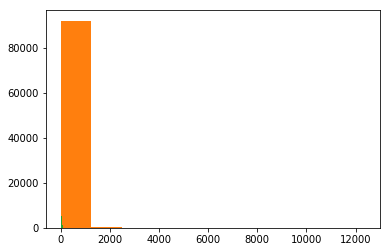

In [210]:
# look at review dist
plt.hist([math.log(x+1) for x in data_users.review_count])
print(plt.hist(data_users.review_count))
print(plt.hist(data_users.review_count[data_users.review_count<=100]))


(array([57240., 13248.,  5441.,  3004.,  2079.,  1514.,  1162.,   914.,
         758.,   693.]), array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]), <a list of 10 Patch objects>)


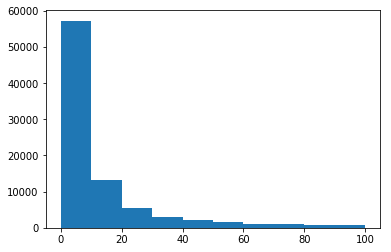

In [211]:
print(plt.hist(data_users.review_count[data_users.review_count<=100]))


In [9]:
# look at businesses
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Event Planning & Services,Grocery,Indian,Middle Eastern,Mediterranean,Asian Fusion,Ice Cream & Frozen Yogurt,Thai,Mexican,Pubs
0,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,...,0,0,0,0,0,0,0,1,0,0
1,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,...,0,0,0,0,0,0,0,1,0,0
2,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,...,0,0,0,0,0,0,0,1,0,0
3,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,...,0,0,0,0,0,0,0,1,0,0
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,...,0,0,0,0,0,0,0,1,0,0


In [122]:
data_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'category', 'WiFi',
       'RestaurantsTakeOut', 'Alcohol', 'BikeParking',
       'RestaurantsReservations', 'OutdoorSeating', 'RestaurantsDelivery',
       'RestaurantsPriceRange2', 'RestaurantsAttire', 'NoiseLevel', 'HasTV',
       'RestaurantsGoodForGroups', 'GoodForKids', 'Coffee & Tea', 'Nightlife',
       'Bars', 'Specialty Food', 'Sandwiches', 'Breakfast & Brunch',
       'Canadian (New)', 'Cafes', 'Chinese', 'Italian', 'Bakeries', 'Pizza',
       'Japanese', 'Desserts', 'Fast Food', 'Burgers',
       'American (Traditional)', 'Sushi Bars', 'Event Planning & Services',
       'Grocery', 'Indian', 'Middle Eastern', 'Mediterranean', 'Asian Fusion',
       'Ice Cream & Frozen Yogurt', 'Thai', 'Mexican', 'Pubs'],
      dtype='object')

In [125]:
data_business.shape

(10093, 85)

In [123]:
data_business.category.head(20)

0                                        Bakeries, Food
1     Juice Bars & Smoothies, Food, Restaurants, Fas...
2     Restaurants, Nightlife, Breakfast & Brunch, Ve...
3     Restaurants, Breakfast & Brunch, Bars, Modern ...
4                                  Italian, Restaurants
5                         Tex-Mex, Mexican, Restaurants
6      Grocery, Restaurants, Steakhouses, Butcher, Food
7     Middle Eastern, Restaurants, Salad, Breakfast ...
8     Sandwiches, Cafes, Food, Restaurants, Coffee &...
9                               Sushi Bars, Restaurants
10    Desserts, Ice Cream & Frozen Yogurt, Food, Res...
11                              Restaurants, Vietnamese
12                        Soup, Restaurants, Sandwiches
13                    Food, Grocery, Convenience Stores
14    Restaurants, Breakfast & Brunch, Sandwiches, F...
15                     Meat Shops, Food, Specialty Food
16    Restaurants, Mexican, Ethnic Food, Specialty F...
17                    Sushi Bars, Japanese, Rest

In [119]:
data_business.dtypes

business_id                   object
name                          object
address                       object
city                          object
state                         object
postal_code                   object
latitude                     float64
longitude                    float64
stars                        float64
review_count                 float64
category                      object
WiFi                          object
RestaurantsTakeOut            object
Alcohol                       object
BikeParking                   object
RestaurantsReservations       object
OutdoorSeating                object
RestaurantsDelivery           object
RestaurantsPriceRange2        object
RestaurantsAttire             object
NoiseLevel                    object
HasTV                         object
RestaurantsGoodForGroups      object
GoodForKids                   object
Coffee & Tea                 float64
Nightlife                    float64
Bars                         float64
S

In [24]:
data_business.describe()

,latitude,longitude,stars,review_count
count,10093.000000,10093.000000,10093.000000,10093.000000
mean,43.681057,-79.392436,3.464629,40.679976
std,0.046194,0.061268,0.761838,76.631472
min,43.592327,-79.703390,1.000000,3.000000
25%,43.650806,-79.418194,3.000000,6.000000
50%,43.664176,-79.393529,3.500000,15.000000
75%,43.696332,-79.371987,4.000000,43.000000
max,43.876501,-79.137178,5.000000,2121.000000


In [166]:
data_business.astype(bool).sum(axis=0) # number of nonzeros

business_id                 10093
name                        10093
address                     10093
city                        10093
state                       10093
postal_code                 10093
latitude                    10093
longitude                   10093
stars                       10093
review_count                10093
category                    10093
WiFi                        10093
RestaurantsTakeOut          10093
Alcohol                     10093
BikeParking                 10093
RestaurantsReservations      9454
OutdoorSeating               9224
RestaurantsDelivery          9245
RestaurantsPriceRange2      10093
RestaurantsAttire           10093
NoiseLevel                  10093
HasTV                       10093
RestaurantsGoodForGroups    10093
GoodForKids                 10093
Coffee & Tea                 1368
Nightlife                    1162
Bars                         1111
Specialty Food                801
Sandwiches                    705
Breakfast & Br

(array([  54.,  152.,  517.,  957.,    0., 1897., 2632., 2497., 1132.,
         255.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

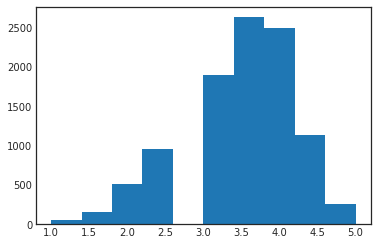

In [282]:
plt.hist(data_business.stars)

In [167]:
data_business.isnull().sum()

business_id                    0
name                           0
address                       58
city                           0
state                          0
postal_code                   38
latitude                       0
longitude                      0
stars                          0
review_count                   0
category                       0
WiFi                        3849
RestaurantsTakeOut          1889
Alcohol                     4127
BikeParking                 3560
RestaurantsReservations     3465
OutdoorSeating              3021
RestaurantsDelivery         3403
RestaurantsPriceRange2      1261
RestaurantsAttire           3754
NoiseLevel                  4476
HasTV                       4098
RestaurantsGoodForGroups    3316
GoodForKids                 3438
Coffee & Tea                   0
Nightlife                      0
Bars                           0
Specialty Food                 0
Sandwiches                     0
Breakfast & Brunch             0
          

In [293]:
# look at reviews
data_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,AakkkTuGZA2KBodKi2_u8A,0.0,2012-07-16 00:37:14,0.693147,JVcjMhlavKKn3UIt9p9OXA,1.0,I cannot believe how things have changed in 3 ...,0.693147,TpyOT5E16YASd7EWjLQlrw,2012
1,YvrylyuWgbP90RgMqZQVnQ,0.0,2017-04-07 21:27:49,0.000000,svK3nBU7Rk8VfGorlrN52A,5.0,You can't really find anything wrong with this...,0.000000,NJlxGtouq06hhC7sS2ECYw,2017
2,y-Iw6dZflNix4BdwIyTNGA,0.0,2014-06-27 21:19:23,0.000000,4bUyL7lzoWzDZaJETAKREg,3.0,Good selection of classes of beers and mains. ...,0.000000,_N7Ndn29bpll_961oPeEfw,2014
3,YSUcHqlKMPHHJ_cTrqtNrA,0.0,2017-12-29 13:55:19,0.000000,E6B-2U2sGG3xgmnNWZAEew,1.0,Came here on a Thursday night at 6:30 p.m. My ...,0.000000,DbccYu3OppWKl21OanZnTg,2017
4,jzveTy7ogH7cg9axZ78ENg,0.0,2015-04-01 13:31:35,0.000000,0NRNA8qIq9nKw5FcwyOxcQ,4.0,Very nice eating environment and the food are ...,0.000000,54kpqrxF9DEPpwa51hO_Bw,2015


In [291]:
#check sparsity
n_users = data_review.user_id.unique().shape[0]
n_items = data_review.business_id.unique().shape[0]

print('Number of users: {}'.format(n_users))
print('Number of models: {}'.format(n_items))
print('Sparsity: {:4.3f}%'.format(float(data_review.shape[0]) / float(n_users*n_items) * 100))

Number of users: 92381
Number of models: 10093
Sparsity: 0.044%


In [35]:
data_review.text[0]

"I cannot believe how things have changed in 3 years. I picked up duck congee sometime in the winter when my hubby was sick.  I was very disappointed because the ginger fish sauce tasted like it had gone bad (it should never be bitter).  Today, my hubby wanted to eat there since he was craving the duck congee and most places don't serve the duck & coleslaw side. We waited about 10 minutes to get our menu.  After we placed our orders, we waited another 5 minutes to get the tea that most places bring with the menu.  I could go on with the details but the gist of the story is they were understaffed or the staff was slow.  The worst part of it was that the service.  The servers make us feel bad for asking for anything (like when they took our order).  We had arrived and placed our order before another couple bside us at least 10 minutes ahead but somehow, this couple received their pho before mine.  They were almost done eating their pho before mine came out."

In [36]:
data_review.describe()# need log cool,funny and useful

,cool,funny,stars,useful,year
count,422050.000000,422050.000000,422050.000000,422050.000000,422050.000000
mean,0.515505,0.376747,3.626194,1.108795,2015.000218
std,2.043843,1.550754,1.267724,2.670413,2.399685
min,0.000000,0.000000,1.000000,0.000000,2007.000000
25%,0.000000,0.000000,3.000000,0.000000,2013.000000
50%,0.000000,0.000000,4.000000,0.000000,2015.000000
75%,1.000000,0.000000,5.000000,1.000000,2017.000000
max,177.000000,193.000000,5.000000,188.000000,2018.000000


In [45]:
data_review.cool = pd.Series([math.log(x+1) for x in data_review.cool])
data_review.useful = pd.Series([math.log(x+1) for x in data_review.useful])
data_review.funny = pd.Series([math.log(x+1) for x in data_review.funny])


In [46]:
data_review.describe()

,cool,funny,stars,useful,year
count,422050.000000,422050.000000,422050.000000,422050.000000,422050.000000
mean,0.241465,0.174634,3.626194,0.484872,2015.000218
std,0.472046,0.422242,1.267724,0.629168,2.399685
min,0.000000,0.000000,1.000000,0.000000,2007.000000
25%,0.000000,0.000000,3.000000,0.000000,2013.000000
50%,0.000000,0.000000,4.000000,0.000000,2015.000000
75%,0.693147,0.000000,5.000000,0.693147,2017.000000
max,5.181784,5.267858,5.000000,5.241747,2018.000000


(array([3.16356e+05, 6.47680e+04, 2.98780e+04, 7.64300e+03, 2.55700e+03,
        3.81000e+02, 2.20000e+02, 1.39000e+02, 1.05000e+02, 3.00000e+00]),
 array([0.        , 0.51817836, 1.03635671, 1.55453507, 2.07271342,
        2.59089178, 3.10907013, 3.62724849, 4.14542684, 4.6636052 ,
        5.18178355]),
 <a list of 10 Patch objects>)

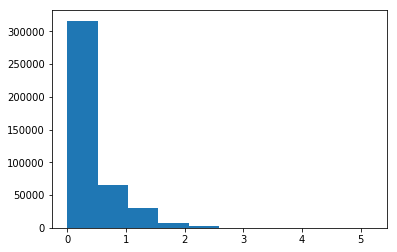

In [47]:
plt.hist(data_review.cool)# still very skewed

(array([3.46833e+05, 4.59420e+04, 2.03100e+04, 6.67700e+03, 1.42800e+03,
        5.28000e+02, 2.49000e+02, 7.50000e+01, 6.00000e+00, 2.00000e+00]),
 array([0.        , 0.52678582, 1.05357163, 1.58035745, 2.10714326,
        2.63392908, 3.1607149 , 3.68750071, 4.21428653, 4.74107234,
        5.26785816]),
 <a list of 10 Patch objects>)

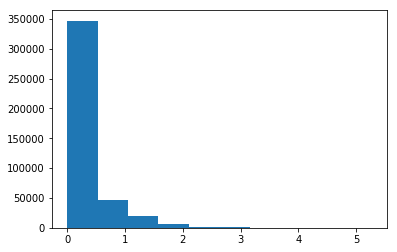

In [48]:
plt.hist(data_review.funny)

(array([2.32405e+05, 9.22760e+04, 6.44810e+04, 2.56480e+04, 5.18700e+03,
        1.41400e+03, 3.46000e+02, 1.60000e+02, 1.31000e+02, 2.00000e+00]),
 array([0.        , 0.5241747 , 1.0483494 , 1.5725241 , 2.09669881,
        2.62087351, 3.14504821, 3.66922291, 4.19339761, 4.71757231,
        5.24174702]),
 <a list of 10 Patch objects>)

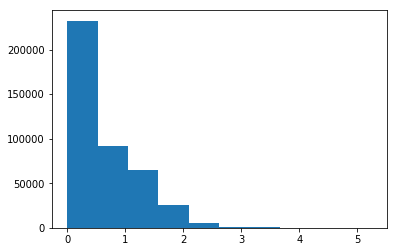

In [49]:
plt.hist(data_review.useful)

In [261]:
# look at dist of user ratings
data_review.stars.describe()

count    422050.000000
mean          3.626194
std           1.267724
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

(array([ 40368.,      0.,  43268.,      0.,      0.,  75500.,      0.,
        137539.,      0., 125375.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

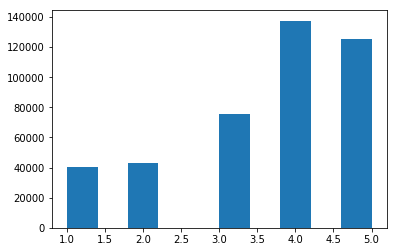

In [262]:
plt.hist(data_review.stars) # lots of 4 and 5s. 

In [115]:
#clean user skewness
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful,year
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,0.425001,2.248677,40.669640,2.530250,31.681298,33.631807,70.635661,2013.552549
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,23.824390,45.181440,621.800074,25.105661,524.225249,137.028649,759.122721,2.514763
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2012.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,2014.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000,18.000000,16.000000,2015.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,5660.000000,7022.000000,82128.000000,2383.000000,86122.000000,12390.000000,89418.000000,2018.000000


In [175]:
# clean user skewness
data_users.review_count = pd.Series([math.log(x+1) for x in data_users.review_count])
data_users.useful =  pd.Series([math.log(x+1) for x in data_users.useful])

#cleam business skewness
data_business.review_count =  pd.Series([math.log(x+1) for x in data_business.review_count])

In [177]:
data_users.describe()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,Chicken Wings,Gastropubs,Diners,Gluten-Free,Thai,Comfort Food,Health Markets,Halal,Caterers,Arts & Entertainment
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,...,92381.000000,92381.00000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,3.559019,5.640803,0.310194,5.640803,3.748855,0.177894,0.582512,2.611922,1.876609,6.013931,...,0.013185,0.00381,0.017623,0.002349,0.074312,0.012546,0.000963,0.007880,0.024983,0.005412
std,1.060362,133.675306,11.661069,133.675306,112.101491,9.290651,15.429126,44.738893,71.549861,125.363341,...,0.114065,0.06161,0.131576,0.048409,0.262279,0.111304,0.031024,0.088422,0.156076,0.073370
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,23733.000000,2401.000000,23733.000000,23891.000000,2261.000000,3575.000000,4901.000000,12732.000000,11579.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
data_business.describe()

,latitude,longitude,stars,review_count,Coffee & Tea,Nightlife,Bars,Specialty Food,Sandwiches,Breakfast & Brunch,...,Halal,Gluten-Free,Food Delivery Services,Wine Bars,Delis,Health Markets,Tea Rooms,Sports Bars,Gastropubs,Tapas/Small Plates
count,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,...,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000
mean,43.681057,-79.392436,3.464629,2.957113,1.150003,0.634750,0.629464,0.833237,0.936205,0.858503,...,0.870183,0.739202,0.847934,0.563895,0.889617,0.755071,0.970510,0.572519,0.827071,0.736900
std,0.046194,0.061268,0.761838,1.166339,3.266034,1.849299,1.871181,3.056503,3.734560,3.510237,...,7.464651,6.466833,7.853991,5.095669,8.485234,7.102677,9.151189,5.279457,8.648734,7.930511
min,43.592327,-79.703390,1.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.650806,-79.418194,3.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.664176,-79.393529,3.500000,2.772589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.696332,-79.371987,4.000000,3.784190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.876501,-79.137178,5.000000,7.660114,14.256579,16.783993,11.702970,24.348315,27.663830,27.861429,...,130.020000,90.923077,140.309353,60.009231,152.367188,102.377953,154.785714,78.641129,157.282258,189.349515


In [197]:
#look to see if has duplicated reviews
a = data_review.groupby(['business_id','user_id']).agg(['count']).reset_index()

In [231]:
tmp = a.useful.sort_values(by = 'count',ascending = False).reset_index()
tmp[tmp['count'] >1].shape # 10179 user has multiple review for one business

(10179, 2)

In [237]:
multi_review_user_idx = tmp[tmp['count'] >1]
multi_review_user_idx = multi_review_user_idx['index']
multi_review_user_idx

232869

In [289]:
idxx = 19
tmp = data_review[(data_review.user_id == a.loc[multi_review_user_idx[idxx],'user_id'][0]) &
           (data_review.business_id == a.loc[multi_review_user_idx[idxx],'business_id'][0])]
tmp = tmp.sort_values(by = 'date',ascending = True)# Have duplicate comment values. Not sure what would happen
tmp

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
404013,kAjCI0-7igmzWdsXbOuYWQ,0.0,2016-04-10 02:46:03,0.0,6XiJaLv0ukS33LKcSBXiSA,2.0,Gord and I had supper this evening at The Fox....,1.098612,O3pSxv1SyHpY4qi4Q16KzA,2016


In [250]:
tmp.text[162941]

"When the restaurant re-opened I was very excited. I love the convenience and their fresh pressed juices are delicious. I had hoped they would include 100% sustainable packaging and gluten free options. I no longer want to buy single use plastics. It is also no point offering a gluten free filling in a wrap, to people like myself who are intolerant. The menu items are good but there is room for improvement ... I order things fresh rather than from the cooler. I've been patient in waiting for them to get up to speed with their cleanses, etc. but by now they should be including their pricing and promotional materials (and glass bottles)! I feel there is so much potential here that isn't being realized yet. I'll continue to hope for improvements.\n\nHere is an update: I continue to enjoy their freshly made juices. They used to have some great winter drinks but they seem to be no longer on the menu. I am frustrated with the absence of gluten free bread despite mentioning it countless times

In [260]:
data_users[data_users.user_id == a.loc[multi_review_user_idx[idxx],'user_id'][0]]

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,fans,friends,funny,name,review_count,useful,user_id,yelping_since,is_elite,year
6886,3.38,19,0,19,12,0,1,21,12,36,...,34,"fUFOsx_h6eqNERByejrdng, QuZbJquRtbY9O9JrB9NpxQ...",281,Teena,1239,1321,O3pSxv1SyHpY4qi4Q16KzA,2010-07-04 02:52:05,True,2010


In [286]:
# take user latest rating as sole rating

for idxx in range(len(multi_review_user_idx)):
    tmp = data_review[(data_review.user_id == a.loc[multi_review_user_idx[idxx],'user_id'][0]) &
           (data_review.business_id == a.loc[multi_review_user_idx[idxx],'business_id'][0])].sort_values(
        by = 'date',ascending = True)
    
    data_review.drop(tmp.index[0:len(tmp.index)-1],inplace=True)
    

In [290]:
# check if all deleted
#look to see if has duplicated reviews
b = data_review.groupby(['business_id','user_id']).agg(['count']).reset_index()
tmp = b.useful.sort_values(by = 'count',ascending = False).reset_index()
tmp[tmp['count'] >1].shape # all deleted

(0, 2)

In [ ]:
# subtract user avg rating to count for bias and make neg to -1 and pos to 1

unique_users = data_review.user_id.unique()

for i,user in enumerate(unique_users):
    print(i)
    if(i == 0):
        continue
    # get avg rating
    this_avg = float(data_users.average_stars[data_users.user_id == user])
    # get user review mtrx
    tmp = data_review.stars[data_review.user_id == user] - this_avg
    tmp[tmp>0] = 1
    tmp[tmp<0] = -1
    data_review.stars[data_review.user_id == user] = tmp




In [294]:
data_review.shape

(410634, 10)

In [319]:
data_review.stars.unique()

array([-1.,  1.,  0.])

In [320]:
# save this version of data_review
#data_review.to_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/reviews_cleaned.csv')

In [3]:
# read in cleaned review data
data_review = pd.read_csv('/nfs/home/lcu1428/z/Rec/reviews_cleaned.csv',index_col=0)

In [4]:
data_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,year
0,AakkkTuGZA2KBodKi2_u8A,0.0,2012-07-16 00:37:14,0.693147,JVcjMhlavKKn3UIt9p9OXA,-1.0,I cannot believe how things have changed in 3 ...,0.693147,TpyOT5E16YASd7EWjLQlrw,2012
1,YvrylyuWgbP90RgMqZQVnQ,0.0,2017-04-07 21:27:49,0.000000,svK3nBU7Rk8VfGorlrN52A,1.0,You can't really find anything wrong with this...,0.000000,NJlxGtouq06hhC7sS2ECYw,2017
2,y-Iw6dZflNix4BdwIyTNGA,0.0,2014-06-27 21:19:23,0.000000,4bUyL7lzoWzDZaJETAKREg,-1.0,Good selection of classes of beers and mains. ...,0.000000,_N7Ndn29bpll_961oPeEfw,2014
3,YSUcHqlKMPHHJ_cTrqtNrA,0.0,2017-12-29 13:55:19,0.000000,E6B-2U2sGG3xgmnNWZAEew,-1.0,Came here on a Thursday night at 6:30 p.m. My ...,0.000000,DbccYu3OppWKl21OanZnTg,2017
4,jzveTy7ogH7cg9axZ78ENg,0.0,2015-04-01 13:31:35,0.000000,0NRNA8qIq9nKw5FcwyOxcQ,0.0,Very nice eating environment and the food are ...,0.000000,54kpqrxF9DEPpwa51hO_Bw,2015


In [14]:
tmp = pd.pivot_table(data_review, values='stars', index=['user_id'],
                    columns=['business_id'], aggfunc=np.sum,fill_value = 0)


In [15]:
tmp.describe()

business_id,--DaPTJW3-tB1vP-PfdTEg,--SrzpvFLwP_YFwB_Cetow,-0DwB6Swi349EKfbBAOF7A,-0NhdsDJsdarxyDPR523ZQ,-0RRiWDtfnS16AKCtfvBZg,-0aOudcaAyac0VJbMX-L1g,-2EAyppKR_2xuLyvJZEbRQ,-2TBP3ZGu7M-FmfoNJvbrQ,-2hOglg7Lh8ZgclQJ9ba2w,-2uYjztVuVZpkTNAC38zdg,...,zy-JsMCeTlY71akNeBuLvg,zy5UZvaG4iOLSbxuophtTQ,zy_NHTqtfSrfTGGPoqy4Mw,zyw5DjrRks7a8OhmBsgCQQ,zyzDmvnDCAqqIuaThbOFHA,zz3CqZhNx2rQ_Yp6zHze-A,zzH3E5DA8eMzFwv2k5izyw,zzMcX99BPGSOFMZ4boINSQ,zze6IysT7bJFS8gvi6fZ2A,zzvlwkcNR1CCqOPXwuvz2A
count,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,...,92381.00000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000,92381.000000
mean,0.000152,0.000076,0.000054,-0.000087,0.000043,-0.000032,-0.000108,0.000076,-0.000011,0.000011,...,0.00000,-0.000011,0.000011,-0.000325,-0.000011,-0.000130,0.000065,0.000011,-0.000065,0.000032
std,0.021824,0.021067,0.010912,0.015432,0.008059,0.011863,0.013160,0.014341,0.025697,0.010912,...,0.00658,0.012743,0.015779,0.032235,0.003290,0.022314,0.010404,0.005699,0.014714,0.008705
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
tmp.shape

(92381, 10093)

In [18]:
#tmp.to_csv('/Users/ivanchen/Desktop/MSIA/Courses/Blog/git/interactions.csv')

In [168]:
#model
dataset = Dataset()
dataset.fit(data_review.user_id,data_review.business_id)
type(dataset)
num_users, num_items = dataset.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))


Num users: 92381, num_items 10093.


In [171]:
data_users.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since', 'is_elite', 'year',
       'Ice Cream & Frozen Yogurt', 'Korean', 'Tapas/Small Plates',
       'Vietnamese', 'Vegan', 'Caribbean', 'Food Delivery Services', 'Lounges',
       'Pubs', 'Greek', 'Cocktail Bars', 'Mexican', 'Wine Bars', 'Tea Rooms',
       'Delis', 'Vegetarian', 'Ethnic Food', 'Salad', 'Seafood', 'Beer',
       'American (New)', 'Juice Bars & Smoothies', 'Shopping', 'Barbeque',
       'Sports Bars', 'French', 'Chicken Wings', 'Gastropubs', 'Diners',
       'Gluten-Free', 'Thai', 'Comfort Food', 'Health Markets', 'Halal',
       'Caterers', 'Arts & Entertainment'],
      dtype='object')

In [172]:
# fit item and user features. 
dataset.fit_partial(items=data_business.business_id,
                    item_features=['stars'])
# dataset.fit_partial(items=data_business.business_id,
#                     item_features=data_business.longitude)
# dataset.fit_partial(items=data_business.business_id,
#                     item_features=data_business.latitude)
dataset.fit_partial(items=data_business.business_id,
                    item_features=['review_count'])
# fit tags
# start_idx = 24
# for i in range(start_idx,len(data_business.columns)):
#     dataset.fit_partial(items=data_business.business_id,
#                     item_features=data_business[data_business.columns[i]])
tar_cols = [x for x in data_business.columns[24:]]

dataset.fit_partial(items = data_business.business_id,
                   item_features = tar_cols)                                    
                                                
# # dataset.fit_partial(users=data_users.user_id,
# #                     user_features=data_users.review_count)
# dataset.fit_partial(users=data_users.user_id,
#                     user_features=data_users.is_elite)
# # dataset.fit_partial(users=data_users.user_id,
# #                     user_features=data_users.useful)
# dataset.fit_partial(users=data_users.user_id,
#                     user_features=data_users.year)


user_cols = [x for x in data_users[['review_count', 'useful', 'is_elite',
                                   'Ice Cream & Frozen Yogurt', 'Korean', 'Tapas/Small Plates',
       'Vietnamese', 'Vegan', 'Caribbean', 'Food Delivery Services', 'Lounges',
       'Pubs', 'Greek', 'Cocktail Bars', 'Mexican', 'Wine Bars', 'Tea Rooms',
       'Delis', 'Vegetarian', 'Ethnic Food', 'Salad', 'Seafood', 'Beer',
       'American (New)', 'Juice Bars & Smoothies', 'Shopping', 'Barbeque',
       'Sports Bars', 'French', 'Chicken Wings', 'Gastropubs', 'Diners',
       'Gluten-Free', 'Thai', 'Comfort Food', 'Health Markets', 'Halal',
       'Caterers', 'Arts & Entertainment']]]
dataset.fit_partial(users=data_users.user_id,
                    user_features = user_cols)

# Check data
print(type(dataset))
print(dataset.model_dimensions())
print(dataset.user_features_shape())
print(dataset.item_features_shape())
#print(dataset.mapping())
print(dataset.interactions_shape())



<class 'lightfm.data.Dataset'>
(92420, 10156)
(92381, 92420)
(10093, 10156)
(92381, 10093)


In [131]:
# look at item feature mapping
a = dataset.mapping()[3]
list(a.items())[0:10]

[('AakkkTuGZA2KBodKi2_u8A', 0),
 ('YvrylyuWgbP90RgMqZQVnQ', 1),
 ('y-Iw6dZflNix4BdwIyTNGA', 2),
 ('YSUcHqlKMPHHJ_cTrqtNrA', 3),
 ('jzveTy7ogH7cg9axZ78ENg', 4),
 ('dZVMp70AuSa4dQPvx3J4ow', 5),
 ('r395lMbm1ihAQ2sMOcFKow', 6),
 ('TVLAvAFx0FqAkKGKHVjHpQ', 7),
 ('q8MUVVuQpfR6v0HBHmAFxw', 8),
 ('m-cg3stOStMAFEV9-8qnVw', 9)]

In [132]:
print(len(a.keys()))
list(a.keys())[10093:]

10156


['stars',
 'review_count',
 'Coffee & Tea',
 'Nightlife',
 'Bars',
 'Specialty Food',
 'Sandwiches',
 'Breakfast & Brunch',
 'Canadian (New)',
 'Cafes',
 'Chinese',
 'Italian',
 'Bakeries',
 'Pizza',
 'Japanese',
 'Desserts',
 'Fast Food',
 'Burgers',
 'American (Traditional)',
 'Sushi Bars',
 'Event Planning & Services',
 'Grocery',
 'Indian',
 'Middle Eastern',
 'Mediterranean',
 'Asian Fusion',
 'Ice Cream & Frozen Yogurt',
 'Thai',
 'Mexican',
 'Pubs',
 'Shopping',
 'American (New)',
 'Korean',
 'Caterers',
 'Juice Bars & Smoothies',
 'Seafood',
 'Chicken Wings',
 'Salad',
 'Beer',
 'Wine & Spirits',
 'Barbeque',
 'Vietnamese',
 'Vegetarian',
 'French',
 'Ethnic Food',
 'Diners',
 'Vegan',
 'Comfort Food',
 'Greek',
 'Caribbean',
 'Lounges',
 'Cocktail Bars',
 'Arts & Entertainment',
 'Halal',
 'Gluten-Free',
 'Food Delivery Services',
 'Wine Bars',
 'Delis',
 'Health Markets',
 'Tea Rooms',
 'Sports Bars',
 'Gastropubs',
 'Tapas/Small Plates']

In [173]:
#build interaction
(interactions, weights) = dataset.build_interactions([(x['user_id'],
                                                       x['business_id'],
                                                       x['stars']) for index,x in data_review.iterrows()])

print(repr(interactions))

#item features
# item_info_copy=data_business.iloc[[i for i in range(data_business.shape[0]) 
#                                    if data_business.business_id[i] in data_review.business_id.unique()],:]
# print(item_info_copy.shape)
#item_features = dataset.build_item_features(((x['item'], [x['category']])
 #                                             for index,x in data_meta.iterrows()))
    

"""
Build a item features matrix out of an iterable of the form (item id, [list of feature names]) or (item id, {feature name: feature weight}).

Parameters:	
data (iterable of the form) – (item id, [list of feature names]) or (item id, {feature name: feature weight}). Item and feature ids will be translated to internal indices constructed during the fit call.
normalize (bool, optional) – If true, will ensure that feature weights sum to 1 in every row.
Returns:	
feature matrix – Matrix of item features.

Return type:	
CSR matrix (num items, num features)
"""    

<92381x10093 sparse matrix of type '<class 'numpy.int32'>'
	with 410634 stored elements in COOrdinate format>


'\nBuild a item features matrix out of an iterable of the form (item id, [list of feature names]) or (item id, {feature name: feature weight}).\n\nParameters:\t\ndata (iterable of the form) – (item id, [list of feature names]) or (item id, {feature name: feature weight}). Item and feature ids will be translated to internal indices constructed during the fit call.\nnormalize (bool, optional) – If true, will ensure that feature weights sum to 1 in every row.\nReturns:\t\nfeature matrix – Matrix of item features.\n\nReturn type:\t\nCSR matrix (num items, num features)\n'

In [178]:
#target_cols = ['stars','longitude','latitude','review_count']+[x for x in data_business.columns[24:]]
# target_cols = ['stars']+[x for x in data_business.columns[24:]]

# print(target_cols)

# item_features = dataset.build_item_features(((x['business_id'], 
#                                               [y for y in x[target_cols]])
#                                               for index,x in data_business.iterrows()))
# item_features = dataset.build_item_features(((x['business_id'], 
#                                               {'stars':x['stars']})
#                                               for index,x in data_business.iterrows()),normalize = False)
def build_dict(df,tar_cols,val_list):
    rst = {}
    for col in tar_cols:
        if(df[col]>1):
            rst[col]=math.log(df[col])
        else:
            rst[col] = df[col]
    sum_val = sum(list(rst.values())) # get sum of all the tfidf values
    
    if(sum_val == 0):
        return rst
    else:
        
        w = (1-sum(val_list))/sum_val # weight for each tag to be able to sum to 0.25
        for key,value in rst.items():
            rst[key] = value * w
    return rst

def user_build_dict(df,tar_cols,val_list):
    rst = {}
    for col in tar_cols:
        rst[col] = df[col]
    sum_val = sum(list(rst.values())) # get sum of all the tfidf values
    
    if(sum_val == 0):
        return rst
    else:
        w = (1-sum(val_list))/sum_val # weight for each tag to be able to sum to 0.25
        for key,value in rst.items():
            rst[key] = value * w
    return rst

# get max of each column to regularize value to [0,1]
max_star = max(data_business.stars)
max_b_rc = max(data_business.review_count)
print('max_b_rc')
print(max_b_rc)

# give CF info weight 0.5, all other 0.5. Then in others, give (star, review count) 0.25 and tags 0.25
item_features = dataset.build_item_features(((x['business_id'], 
                                              {'stars':0.25*x['stars']/max_star,
                                               'review_count':0.25*x['review_count']/max_b_rc,
                                               **build_dict(x,tar_cols,[0.25*x['stars']/max_star,
                                                           0.25*x['review_count']/max_b_rc])})
                                              for index,x in data_business.iterrows()))


# user_features = dataset.build_user_features(((x['user_id'],
#                                              [x['is_elite'],x['year']])
#                                            for index, x in data_users.iterrows()))
max_u_rc = max(data_users.review_count)
max_useful = max(data_users.useful)
user_features = dataset.build_user_features(((x['user_id'],
                                             {'review_count':0.2*x['review_count']/max_u_rc,'is_elite':0.2*int(x['is_elite']),
                                              'useful':0.2*x['useful']/max_useful,
                                             **user_build_dict(x,user_cols,[0.2*x['review_count']/max_u_rc,
                                                                            0.2*int(x['is_elite']),
                                                                            0.2*x['useful']/max_useful])})
                                           for index, x in data_users.iterrows()))

print(repr(item_features))
print(item_features.shape)

print(repr(user_features))
print(user_features.shape)

max_b_rc
7.660114319173928
<10093x10156 sparse matrix of type '<class 'numpy.float32'>'
	with 645952 stored elements in Compressed Sparse Row format>
(10093, 10156)
<92381x92420 sparse matrix of type '<class 'numpy.float32'>'
	with 3695240 stored elements in Compressed Sparse Row format>
(92381, 92420)


In [184]:
idx = 3
tt = list(item_features[idx].nonzero())
print(item_features[idx].shape)
print(tt)

uu = list(user_features[idx].nonzero())
print(user_features[idx].shape)
uu

(1, 10156)
[array([0, 0, 0, 0], dtype=int32), array([    3, 10093, 10094, 10104], dtype=int32)]
(1, 92420)


[array([0, 0, 0, 0], dtype=int32),
 array([    3, 92381, 92382, 92395], dtype=int32)]

In [180]:
print(len(a.keys()))
print(list(a.keys())[10093:])


10156
['stars', 'review_count', 'Coffee & Tea', 'Nightlife', 'Bars', 'Specialty Food', 'Sandwiches', 'Breakfast & Brunch', 'Canadian (New)', 'Cafes', 'Chinese', 'Italian', 'Bakeries', 'Pizza', 'Japanese', 'Desserts', 'Fast Food', 'Burgers', 'American (Traditional)', 'Sushi Bars', 'Event Planning & Services', 'Grocery', 'Indian', 'Middle Eastern', 'Mediterranean', 'Asian Fusion', 'Ice Cream & Frozen Yogurt', 'Thai', 'Mexican', 'Pubs', 'Shopping', 'American (New)', 'Korean', 'Caterers', 'Juice Bars & Smoothies', 'Seafood', 'Chicken Wings', 'Salad', 'Beer', 'Wine & Spirits', 'Barbeque', 'Vietnamese', 'Vegetarian', 'French', 'Ethnic Food', 'Diners', 'Vegan', 'Comfort Food', 'Greek', 'Caribbean', 'Lounges', 'Cocktail Bars', 'Arts & Entertainment', 'Halal', 'Gluten-Free', 'Food Delivery Services', 'Wine Bars', 'Delis', 'Health Markets', 'Tea Rooms', 'Sports Bars', 'Gastropubs', 'Tapas/Small Plates']


In [181]:
b = dataset.mapping()[1]
print(list(b.items())[0:10])
print(len(b.keys()))
print(list(b.keys())[92381:])

[('TpyOT5E16YASd7EWjLQlrw', 0), ('NJlxGtouq06hhC7sS2ECYw', 1), ('_N7Ndn29bpll_961oPeEfw', 2), ('DbccYu3OppWKl21OanZnTg', 3), ('54kpqrxF9DEPpwa51hO_Bw', 4), ('PFNZVn73upq3oZDG2KnAqA', 5), ('nNVznu_dQsn43SrakB4Ldw', 6), ('mZ1gXzL6Tn5Oky8_j0Kp7g', 7), ('iJCtRAlSvxiUuKlVAnsq0A', 8), ('uLQJAaULt91a263PsRyEqQ', 9)]
92420
['review_count', 'useful', 'is_elite', 'Ice Cream & Frozen Yogurt', 'Korean', 'Tapas/Small Plates', 'Vietnamese', 'Vegan', 'Caribbean', 'Food Delivery Services', 'Lounges', 'Pubs', 'Greek', 'Cocktail Bars', 'Mexican', 'Wine Bars', 'Tea Rooms', 'Delis', 'Vegetarian', 'Ethnic Food', 'Salad', 'Seafood', 'Beer', 'American (New)', 'Juice Bars & Smoothies', 'Shopping', 'Barbeque', 'Sports Bars', 'French', 'Chicken Wings', 'Gastropubs', 'Diners', 'Gluten-Free', 'Thai', 'Comfort Food', 'Health Markets', 'Halal', 'Caterers', 'Arts & Entertainment']


In [185]:
tt = item_features[idx].todense()
import pandas as pd
tt = pd.DataFrame(tt)
print(list(map(set,tt.values)))# feature weight sum to 1, so if two are nonzero, each take weight 0.5. 

uu = user_features[idx].todense()
uu = pd.DataFrame(uu)
list(map(set,uu.values))# feature weight sum to 1, so if two are nonzero, each take weight 0.5. 



[{0.0, 0.5, 0.35390595, 0.075, 0.07109406}]


[{0.0, 0.06503604, 0.09382717, 0.31912476, 0.52201205}]

In [108]:
tt

,0,1,2,3,4,5,6,7,8,9,...,10113,10114,10115,10116,10117,10118,10119,10120,10121,10122
0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
tt.iloc[0,10093:]

10093    0.10000
10094    0.00000
10095    0.00000
10096    0.00000
10097    0.00000
10098    0.00000
10099    0.00000
10100    0.00000
10101    0.00000
10102    0.00000
10103    0.00000
10104    0.00000
10105    0.31084
10106    0.00000
10107    0.00000
10108    0.00000
10109    0.00000
10110    0.00000
10111    0.00000
10112    0.00000
10113    0.00000
10114    0.00000
10115    0.00000
10116    0.00000
10117    0.00000
10118    0.00000
10119    0.00000
10120    0.00000
10121    0.00000
10122    0.08916
Name: 0, dtype: float32

In [186]:
uu

,0,1,2,3,4,5,6,7,8,9,...,92410,92411,92412,92413,92414,92415,92416,92417,92418,92419
0,0.0,0.0,0.0,0.522012,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
ttt = data_business[data_business.business_id == list(a.keys())[idx]]
ttt.iloc[0,24:]

Coffee & Tea                       0
Nightlife                          0
Bars                               0
Specialty Food                     0
Sandwiches                         0
Breakfast & Brunch                 0
Canadian (New)                     0
Cafes                              0
Chinese                            0
Italian                            0
Bakeries                           0
Pizza                        13.6623
Japanese                           0
Desserts                           0
Fast Food                          0
Burgers                            0
American (Traditional)             0
Sushi Bars                         0
Event Planning & Services          0
Grocery                            0
Indian                             0
Middle Eastern                     0
Mediterranean                      0
Asian Fusion                       0
Ice Cream & Frozen Yogurt          0
Thai                               0
Mexican                            0
P

In [46]:
ttt = data_users[data_users.user_id == list(b.keys())[idx]]
ttt.iloc[0,9:]

compliment_plain                                                      4
compliment_profile                                                    0
compliment_writer                                                     1
cool                                                                 73
elite                                                               NaN
fans                                                                 16
friends               EdDmKiz6V89g6Dws9I4AKA, YeWBD7xpYE8Cdyvb9JXoJw...
funny                                                                27
name                                                              Irene
review_count                                                        112
useful                                                              157
user_id                                          nkSf1NKWFGiAyrnCa-A5UA
yelping_since                                       2014-01-17 16:23:23
is_elite                                                        

In [ ]:
math.log(13.8319)

In [139]:
#train-test split
# type(interactions)
# train, test, user_index = rf.train_test_split(interactions.tocsr(), 1, fraction=0.2)

# print('The dataset has %s users and %s items, '
#       'with %s interactions in the test and %s interactions in the training set.'
#       % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))

from lightfm.cross_validation import random_train_test_split
train,test=random_train_test_split(interactions,test_percentage=0.2,random_state=np.random.RandomState(123))

print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))



The dataset has 92381 users and 10093 items, with 82127 interactions in the test and 328507 interactions in the training set.


In [18]:
#model construction

from lightfm import LightFM

# Set the number of threads; you can increase this
# if you have more physical cores available.
NUM_THREADS = 2
NUM_COMPONENTS = 60    
NUM_EPOCHS = 30
ITEM_ALPHA = 1e-6
learning_rate=0.05

# Let's fit a WARP model: these generally have the best performance.
model = LightFM(loss='logistic',random_state=123,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)

# Run 3 epochs and time it.
%time model = model.fit(train,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model, train, num_threads=NUM_THREADS).mean()
print('Collaborative filtering train AUC: %s' % train_auc)#logistic: 0.83, warp: 0.997

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model, test,num_threads=NUM_THREADS).mean()
print('Collaborative filtering test AUC: %s' % test_auc)#test: 0.828, warp:0.825

from lightfm.evaluation import precision_at_k,recall_at_k

print("Train precision: %.2f" % precision_at_k(model, train, k=10,num_threads=NUM_THREADS).mean())#logistic: 0.01,#warp:0.19
print("Test precision: %.2f" % precision_at_k(model, test,train_interactions=train, k=10,num_threads=NUM_THREADS).mean())
#logistic:0.00,#warp:0

print("Train recall: %.2f" % recall_at_k(model, train, k=10,num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test recall: %.2f" % recall_at_k(model, test,train_interactions=train, k=10,num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02

print("Train MRR: %.2f" % reciprocal_rank(model, train,num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test MRR: %.2f" % reciprocal_rank(model, test,train_interactions=train,num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02

# #See what are the scores of testing
# precision_at_k(model, train, k=5)
# precision_at_k(model, test,train_interactions=train,k=5)

CPU times: user 37.5 s, sys: 178 ms, total: 37.7 s
Wall time: 38.3 s
Collaborative filtering train AUC: 0.83137405
Collaborative filtering test AUC: 0.82233745
Train precision: 0.01
Test precision: 0.01
Train recall: 0.03
Test recall: 0.03
Train MRR: 0.05
Test MRR: 0.03


In [23]:
#test corresponding recpmmendation
#transfer data_movies to have corresponding movieid with ratings
rf.sample_train_recommendation(model,train,data_business,range(10),5,'name',mapping=dataset.mapping()[2],tag='category')

user_index=list(set(rf.get_user_index(test)))
rf.sample_test_recommendation(model,train,test,data_business,user_index[0:10],5,'name',mapping=dataset.mapping()[2],train_interactions=train,tag='category')


User 0
     Known positives:
 Bakery Gateau | Bakeries, Food
 Pallucci | Restaurants, Caterers, Italian, Event Planning & Services
 The Combine Eatery | Canadian (New), Bakeries, Restaurants, Food, Bars, Burgers, Nightlife, Mexican, American (New)
 HUSH | Restaurants, Bars, Burgers, American (New), Canadian (New), Seafood, Nightlife
 The Junction Grill | Coffee & Tea, Sandwiches, Breakfast & Brunch, Desserts, Restaurants, Portuguese, Creperies, Food
 Parma Pizza | Restaurants, Pizza
 Americana Hot Dog Co | Hot Dogs, Food, Restaurants
 Mr Souvlaki | Restaurants, Greek
 Tim Hortons | Sandwiches, Delis, Restaurants
 Edible Arrangements | Specialty Food, Flowers & Gifts, Gift Shops, Florists, Shopping, Chocolatiers & Shops, Food
 Aji Sai Japanese Restaurant | Restaurants, Japanese
 Ichiriki Japanese Restaurant | Restaurants, Japanese
 Dangerous Dan's Diner | Diners, Sandwiches, Restaurants, Burgers
 Baldini Restaurant | Italian, Gluten-Free, Restaurants, Pizza
 Tito Ron's | Food Stands, Re

In [362]:
a = model.get_item_representations()
print(a)
print(len(a))
print(len(a[0]))

(array([1.4789032 , 2.0013642 , 2.59367   , ..., 0.27254915, 0.34946543,
       0.75434256], dtype=float32), array([[ 0.01559211, -0.00051049, -0.00633109, ..., -0.02010816,
        -0.00401586, -0.00393232],
       [ 0.01376589,  0.01750455, -0.00031275, ..., -0.02275765,
         0.00691683, -0.0153024 ],
       [ 0.01228314, -0.00170164, -0.01399523, ..., -0.00954075,
        -0.00784688,  0.00229771],
       ...,
       [-0.00232242, -0.00114745, -0.00317956, ..., -0.00130687,
         0.00052543,  0.00098383],
       [ 0.00175862,  0.00531463, -0.00098956, ...,  0.00197267,
         0.00172677, -0.00270632],
       [-0.00915402,  0.00407758,  0.00476798, ..., -0.00048821,
         0.00630165,  0.00865522]], dtype=float32))
2
10093


In [365]:
# mydf = pd.DataFrame(a,columns=['bias','embed'])
# mydf.head(30)
a[1][0]
len(a[1][0])

90

In [364]:

# Let's fit a WARP model: these generally have the best performance.
model = LightFM(loss='warp',random_state=123,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)

# Run 3 epochs and time it.
%time model = model.fit(train,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model, train, num_threads=NUM_THREADS).mean()
print('Collaborative filtering train AUC: %s' % train_auc)#logistic: 0.83, warp: 0.997

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model, test,num_threads=NUM_THREADS).mean()
print('Collaborative filtering test AUC: %s' % test_auc)#test: 0.828, warp:0.825

from lightfm.evaluation import precision_at_k,recall_at_k

print("Train precision: %.2f" % precision_at_k(model, train, k=10,num_threads=NUM_THREADS).mean())#logistic: 0.65,#warp:0.19
print("Test precision: %.2f" % precision_at_k(model, test,train_interactions=train, k=10,num_threads=NUM_THREADS).mean())#0.21,#warp:0

print("Train MRR: %.2f" % reciprocal_rank(model, train,num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test MRR: %.2f" % reciprocal_rank(model, test,train_interactions=train,num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02



CPU times: user 38 s, sys: 340 ms, total: 38.4 s
Wall time: 42.1 s
Collaborative filtering train AUC: 0.99913293
Collaborative filtering test AUC: 0.8297227
Train precision: 0.18
Test precision: 0.01


KeyboardInterrupt: 

In [24]:

NUM_THREADS = 12
NUM_COMPONENTS = 21    
NUM_EPOCHS = 16
ITEM_ALPHA = 5.97e-6
learning_rate=0.03

model.ii = LightFM(loss='logistic',random_state=123,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
                   learning_rate = learning_rate)

# Run 3 epochs and time it.
%time model.ii = model.ii.fit(train,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model.ii, train,item_features=item_features, num_threads=NUM_THREADS).mean()
print('Hybrid train AUC: %s' % train_auc)#0.9545

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model.ii, test,item_features=item_features,num_threads=NUM_THREADS).mean()
print('Hybrid test AUC: %s' % test_auc)#0.81,#0.803

#precision @k
print("Train precision: %.2f" % precision_at_k(model.ii, train,item_features=item_features, k=10,num_threads=NUM_THREADS).mean())#0.41
print("Test precision: %.2f" % precision_at_k(model.ii, test,train_interactions=train,
                                              item_features=item_features, k=10,num_threads=NUM_THREADS).mean())#0.14

print("Train MRR: %.2f" % reciprocal_rank(model.ii, train,item_features=item_features,num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test MRR: %.2f" % reciprocal_rank(model.ii, test,train_interactions=train,item_features=item_features,num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02


CPU times: user 33min 36s, sys: 95 ms, total: 33min 36s
Wall time: 2min 48s
Hybrid train AUC: 0.6468181
Hybrid test AUC: 0.6450042
Train precision: 0.00
Test precision: 0.00
Train MRR: 0.00
Test MRR: 0.00


In [25]:


NUM_THREADS = 12
NUM_COMPONENTS = 21   
NUM_EPOCHS = 16
ITEM_ALPHA = 5.97e-6
learning_rate=0.03
#Now include item features
model.ii = LightFM(loss='warp',random_state=123,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
                  learning_rate = learning_rate)

# Run 3 epochs and time it.
%time model.ii = model.ii.fit(train,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model.ii, train,item_features=item_features, num_threads=NUM_THREADS).mean()
print(' Hybrid train AUC: %s' % train_auc)#0.9545

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model.ii, test,item_features=item_features,num_threads=NUM_THREADS).mean()
print(' Hybrid test AUC: %s' % test_auc)#0.81,#0.803

#precision @k
print("Train precision: %.2f" % precision_at_k(model.ii, train,item_features=item_features, k=10,
                                              num_threads=NUM_THREADS).mean())#0.41
print("Test precision: %.2f" % precision_at_k(model.ii, test,train_interactions=train,
                                              item_features=item_features, k=10,num_threads=NUM_THREADS).mean())#0.14

print("Train MRR: %.2f" % reciprocal_rank(model.ii, train,item_features=item_features,num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test MRR: %.2f" % reciprocal_rank(model.ii, test,train_interactions=train,item_features=item_features,
                                        num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02

CPU times: user 48min 18s, sys: 132 ms, total: 48min 18s
Wall time: 4min 2s
 Hybrid train AUC: 0.95395213
 Hybrid test AUC: 0.81536686
Train precision: 0.03
Test precision: 0.01
Train MRR: 0.12
Test MRR: 0.03


In [141]:
#Combine user_feature
model.iii = LightFM(loss='logistic',
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS)

# Run 3 epochs and time it.
%time model.iii = model.iii.fit(train,user_features=user_features,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model.iii, train,user_features=user_features,item_features=item_features, num_threads=NUM_THREADS).mean()
print(' Hybrid train AUC: %s' % train_auc)#0.945

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model.iii, test,user_features=user_features,item_features=item_features,num_threads=NUM_THREADS).mean()
print('Hybrid test AUC: %s' % test_auc)#0.789,#0.784

#precision @k
print("Train precision: %.2f" % precision_at_k(model.iii, train,
                                               item_features=item_features,user_features=user_features, k=10,
                                               num_threads=NUM_THREADS).mean())#0.41
print("Test precision: %.2f" % precision_at_k(model.iii, test,train_interactions=train,
                                              item_features=item_features,user_features=user_features, k=10,
                                             num_threads=NUM_THREADS).mean())#0.17

print("Train MRR: %.2f" % reciprocal_rank(model.iii, train,
                                         item_features=item_features,user_features=user_features,
                                         num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test MRR: %.2f" % reciprocal_rank(model.iii, test,train_interactions=train,
                                        item_features=item_features,user_features=user_features,
                                        num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02

CPU times: user 1h 25min 52s, sys: 206 ms, total: 1h 25min 52s
Wall time: 5min 52s
 Hybrid train AUC: 0.76005036
Hybrid test AUC: 0.76049745
Train precision: 0.01
Test precision: 0.00
Train MRR: 0.02
Test MRR: 0.01


In [187]:
#Combine user_feature
NUM_THREADS = 15
NUM_COMPONENTS = 21   
NUM_EPOCHS = 16
ITEM_ALPHA = 5.97e-6
learning_rate=0.03
model.iii = LightFM(loss='warp',
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS)

# Run 3 epochs and time it.
%time model.iii = model.iii.fit(train,user_features=user_features,item_features=item_features,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model.iii, train,user_features=user_features,item_features=item_features, num_threads=NUM_THREADS).mean()
print('Hybrid train AUC: %s' % train_auc)#0.945

# We pass in the train interactions to exclude them from predictions.
# This is to simulate a recommender system where we do not
# re-recommend things the user has already interacted with in the train
# set.


test_auc = auc_score(model.iii, test,user_features=user_features,item_features=item_features,num_threads=NUM_THREADS).mean()
print('Hybrid test AUC: %s' % test_auc)#0.789,#0.784

#precision @k
print("Train precision: %.2f" % precision_at_k(model.iii, train,
                                               item_features=item_features,user_features=user_features, k=10,
                                              num_threads=NUM_THREADS).mean())#0.41
print("Test precision: %.2f" % precision_at_k(model.iii, test,train_interactions=train,
                                              item_features=item_features,user_features=user_features, k=10,
                                             num_threads=NUM_THREADS).mean())#0.17

print("Train MRR: %.2f" % reciprocal_rank(model.iii, train,
                                         item_features=item_features,user_features=user_features,
                                         num_threads=NUM_THREADS).mean())
#logistic:0.03 #warp: 0.68
print("Test MRR: %.2f" % reciprocal_rank(model.iii, test,train_interactions=train,
                                        item_features=item_features,user_features=user_features,
                                        num_threads=NUM_THREADS).mean())
#logistic 0.03 #warp:0.02

CPU times: user 2h 19min 29s, sys: 350 ms, total: 2h 19min 30s
Wall time: 9min 21s
Hybrid train AUC: 0.95168567
Hybrid test AUC: 0.8817062
Train precision: 0.03
Test precision: 0.01
Train MRR: 0.11
Test MRR: 0.06


In [ ]:
# get similar tags
def get_similar_tags(model, tag_id):
    # Define similarity as the cosine of the angle
    # between the tag latent vectors

    # Normalize the vectors to unit length
    tag_embeddings = (model.item_embeddings.T
                      / np.linalg.norm(model.item_embeddings, axis=1)).T

    query_embedding = tag_embeddings[tag_id]
    similarity = np.dot(tag_embeddings, query_embedding)
    most_similar = np.argsort(-similarity)[1:4]

    return most_similar


for tag in (''):
    tag_id = tag_labels.tolist().index(tag)
    print('Most similar tags for %s: %s' % (tag_labels[tag_id],
                                            tag_labels[get_similar_tags(model, tag_id)]))

In [158]:
dd = model.iii.item_embeddings.T
print(dd)
print(len(dd))
print(len(dd[0]))

[[-0.04254477  0.298941    0.06940521 ...  0.59771866 -0.03987888
   0.02562206]
 [ 0.01097151 -0.23207496  0.09399397 ...  0.43572572  0.80798644
   0.3799377 ]
 [-0.5098966  -0.17805943 -0.21924093 ... -1.7438109  -1.1694859
  -0.21856533]
 ...
 [ 0.07328191 -0.17466976  0.04314532 ... -1.0016325  -0.64007884
  -1.9462746 ]
 [ 0.05165957 -0.16462566 -0.07643289 ...  0.05714436  0.13503641
   0.33390483]
 [-0.01642112 -0.4269701  -0.32620946 ... -0.8033999  -1.5001334
  -2.1533294 ]]
21
10156


In [157]:
ddd = np.linalg.norm(model.iii.item_embeddings, axis=1).T
print(ddd)
print(len(ddd))

[0.8767758 1.2064056 1.1681184 ... 4.1274815 4.212181  4.4031777]
10156


TypeError: object of type 'numpy.float32' has no len()

In [155]:
dd/ddd

array([[-0.04852412,  0.24779475,  0.05941625, ...,  0.14481437,
        -0.00946751,  0.00581899],
       [ 0.01251347, -0.19236892,  0.08046614, ...,  0.10556697,
         0.1918214 ,  0.08628716],
       [-0.5815587 , -0.14759499, -0.18768726, ..., -0.42248788,
        -0.2776438 , -0.04963809],
       ...,
       [ 0.08358113, -0.14478527,  0.03693574, ..., -0.24267401,
        -0.151959  , -0.44201592],
       [ 0.05891994, -0.13645962, -0.06543249, ...,  0.01384485,
         0.03205855,  0.07583269],
       [-0.01872899, -0.35391918, -0.2792606 , ..., -0.19464652,
        -0.35614172, -0.48903984]], dtype=float32)

Iteration No: 1 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1339.4599
Function value obtained: -0.6911
Current minimum: -0.6911
Iteration No: 2 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoc

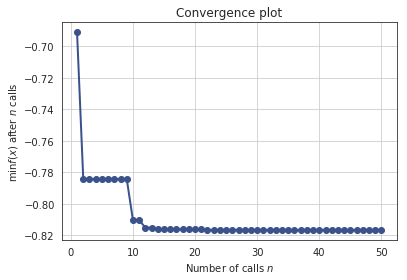

In [23]:
#Tunning Hyperparameters
num_thread = 12
NUM_COMPONENTS = 60    
NUM_EPOCHS = 30
ITEM_ALPHA = 1e-6
learning_rate=0.05

# iterarray = range(5, 90, 5)

# #Initialize model.
# model = LightFM(loss='warp',random_state=123,
#                 item_alpha=ITEM_ALPHA,
#                no_components=NUM_COMPONENTS,
#                learning_rate=learning_rate)
# model.fit(train, epochs=0);

# model, train_patk, test_patk,warp_duration,train_warp_auc,test_warp_auc = rf.patk_learning_curve(
#     model, train, test, iterarray, k=5, **{'num_threads': num_thread}
# )#why every time it outputs different values?


# #model.ii
# model.ii= LightFM(loss='warp',random_state=123,
#                 item_alpha=ITEM_ALPHA,
#                no_components=NUM_COMPONENTS, learning_rate=learning_rate)

# # Run 3 epochs and time it.
# %time model.ii= model.ii.fit(train,item_features=item_features,epochs=0)

# model.ii, train_patk, test_patk,warp_duration,train_warp_auc,test_warp_auc = rf.patk_learning_curve(
#     model.ii, train, test, iterarray,item_features=item_features, k=10, **{'num_threads': num_thread}
# )#why every time it outputs different values?



# #plot curves
# import seaborn as sns
# sns.set_style('white')
# #plot duration
# ax = plt.subplot(1, 1, 1)
# fig = ax.get_figure();
# sns.despine(fig);
# rf.plot_vec(iterarray,warp_duration,'duration')
# plt.show()
# # Plot train on left
# ax = plt.subplot(2, 2, 1)
# fig = ax.get_figure();
# sns.despine(fig);
# rf.plot_patk(iterarray, train_patk,
#          'Train', k=5)
# ax = plt.subplot(2, 2, 3)
# fig = ax.get_figure();
# sns.despine(fig);
# rf.plot_vec(iterarray,train_warp_auc,'train_auc')


# # Plot test on right
# ax = plt.subplot(2, 2, 2)
# fig = ax.get_figure();
# sns.despine(fig);
# rf.plot_patk(iterarray, test_patk,
#          'Test', k=5)

# ax = plt.subplot(2, 2, 4)
# fig = ax.get_figure();
# sns.despine(fig);
# rf.plot_vec(iterarray,test_warp_auc,'test_auc')

# plt.show();

#Using sk-learn optimizer
from scipy.optimize import brute
from skopt import forest_minimize,gbrt_minimize,dummy_minimize



#for model include item_Features
def objective(params):
    # unpack
    epochs, learning_rate,\
    no_components, alpha = params
    
    user_alpha = alpha
    item_alpha = alpha
    model.iii = LightFM(loss='warp',
                    random_state=123,
                    learning_rate=learning_rate,
                    no_components=no_components,
                    #user_alpha=user_alpha,
                    item_alpha=item_alpha)
    model.iii.fit(train, epochs=epochs,
              num_threads=num_thread,item_features=item_features
                  #,user_features=user_features
                  , verbose=True)
    
    patks = auc_score(model.iii, test,
                           train_interactions=train,
                           item_features=item_features
                      #,user_features = user_features
                      , num_threads=num_thread).mean()
#     mapatk = np.mean(patks)
    # Make negative because we want to _minimize_ objective
#     out = -mapatk
    out = -patks
    # Handle some weird numerical shit going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

space = [(10, 80), # epochs
         (0.001, 0.4, 'log-uniform'), # learning_rate
         (20, 100), # no_components
         (10**-6, 0.1, 'log-uniform'), # alpha
        ]

res_fm = gbrt_minimize(objective, space, n_calls=50,
                     random_state=0,
                     verbose=True)
print('Maximimum auc found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')
params = ['epochs', 'learning_rate', 'no_components', 'alpha']
for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))
from skopt.plots import plot_convergence
plot_convergence(res_fm);
# #test to see get similar tags
# tags=data_meta.category[0:3].tolist()
# for tag in tags:
#     tag_id = data_meta.category.tolist().index(tag)
#     print('Most similar tags for %s: %s' % (data_meta.category[tag_id],
#                                             data_meta.category[get_similar_tags(model.ii, tag_id)]))